In [90]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# the model
from sklearn.linear_model import LogisticRegression

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from livelossplot.keras import PlotLossesCallback
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Input
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler, Callback
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import keras





# for training our model
train_values = pd.read_csv('train_values.csv', index_col='patient_id')
train_labels = pd.read_csv('train_labels.csv', index_col='patient_id')

In [97]:
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'resting_blood_pressure',
                    'chest_pain_type',
                    'resting_ekg_results',
                    'fasting_blood_sugar_gt_120_mg_per_dl',
                    'resting_ekg_results',
                    'serum_cholesterol_mg_per_dl',
                    'exercise_induced_angina',
                    'slope_of_peak_exercise_st_segment',
                     'num_major_vessels',
                    ]
x_train_subset = x_train[selected_features]

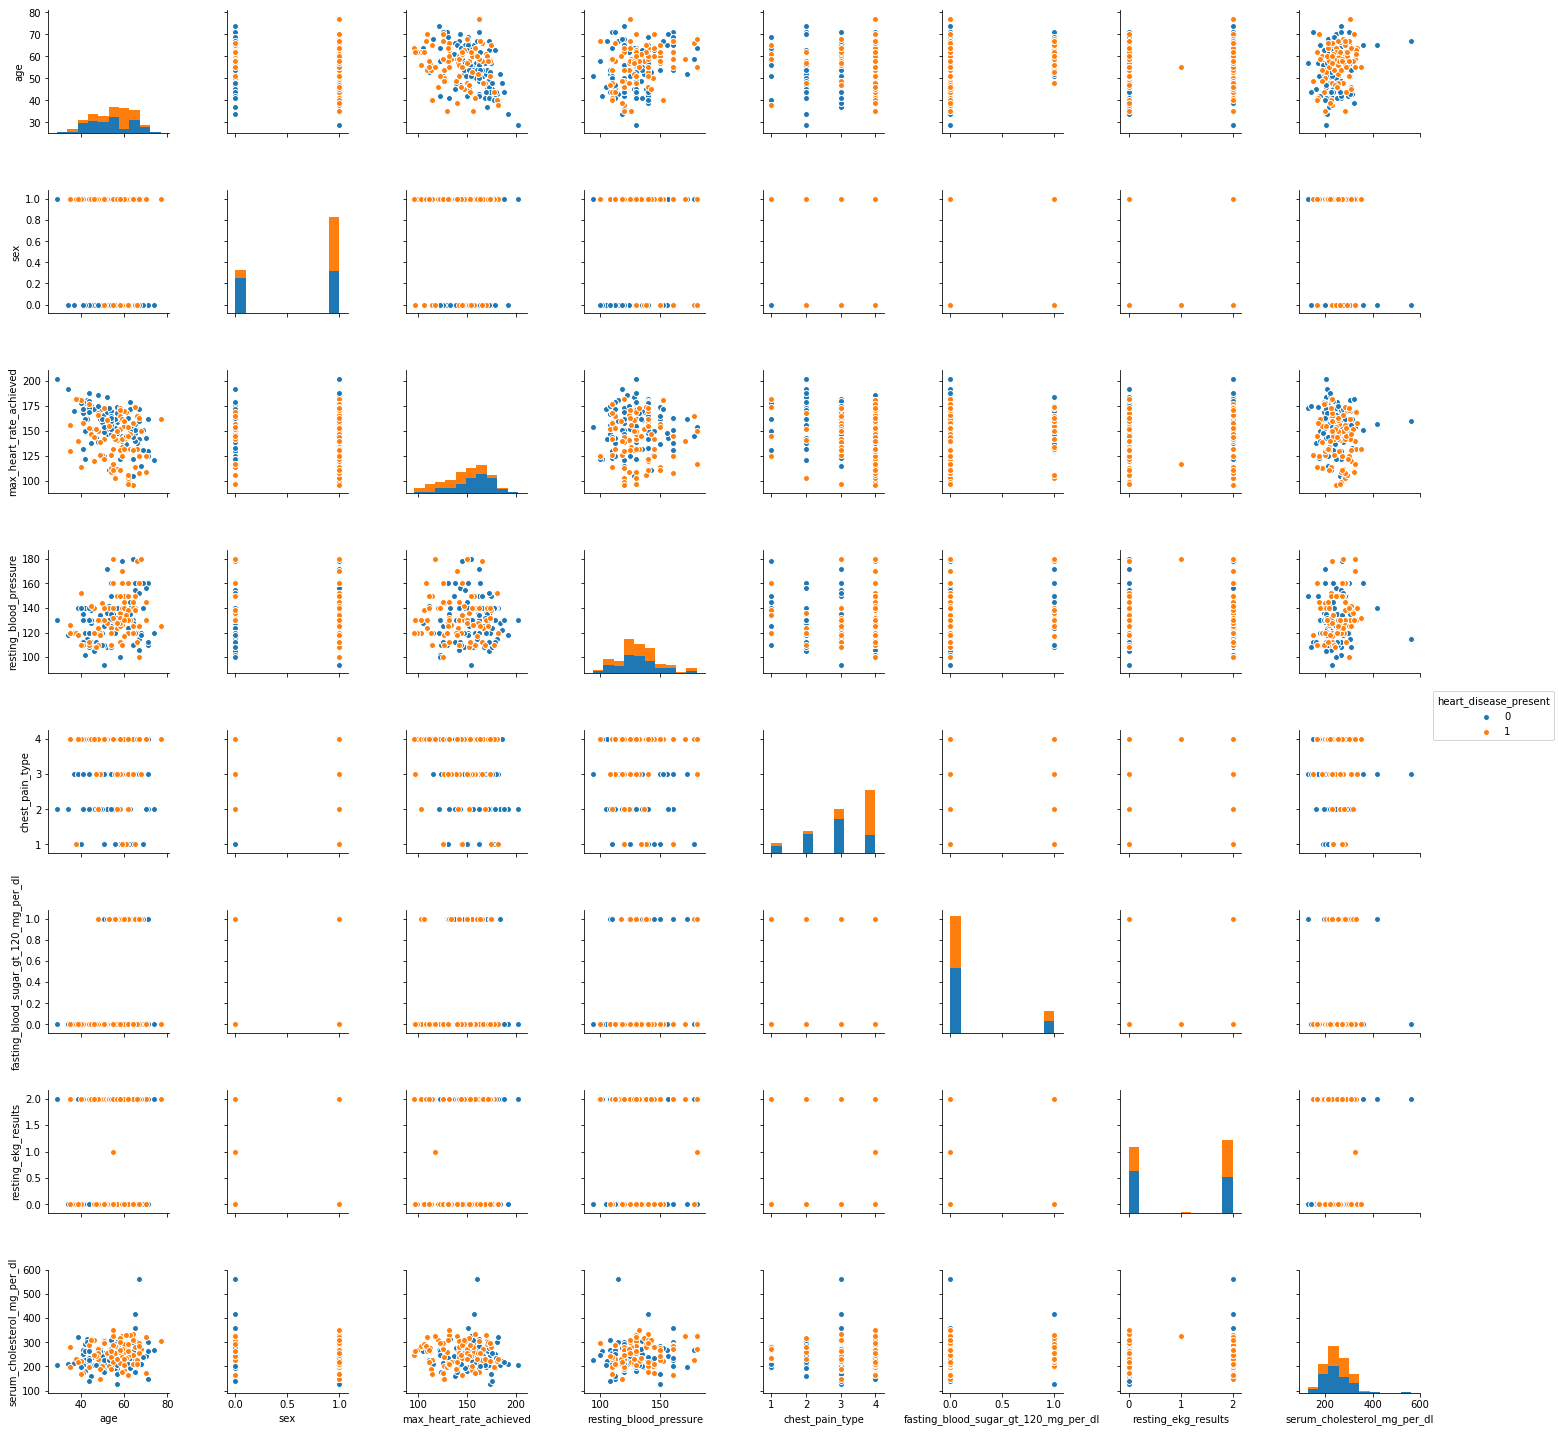

In [79]:
sns.pairplot(x_train.join(y_train), 
             hue='heart_disease_present', 
             vars=selected_features)

In [98]:

pipe = Pipeline(steps=[('scale', StandardScaler()), 
                       ('logistic', LogisticRegression())])
pipe


logreg = LogisticRegression()


param_grid = {'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 
              'logistic__penalty': ['l1', 'l2']}

logreg_gs = GridSearchCV(logreg,parameters, cv=10, return_train_score = True, scoring = 'recall')

logreg_gs.fit(x_train_subset,y_train.values.reshape((y_train.size,)))

print("Best CV params", logreg_gs.best_params_)

best_lr = logreg_gs.best_estimator_

coefs = best_lr.coef_

print("Total number of features:",coefs.size)

print('Number of selected features: {}'.format(np.count_nonzero(coefs)))


/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

Best CV params {'C': 10, 'penalty': 'l1'}
Total number of features: 12
Number of selected features: 12


/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

In [99]:
print("Best CV params", gs.best_params_)
print("Total number of features:",coefs.size)

print('Number of selected features: {}'.format(np.count_nonzero(coefs)))


Best CV params {'logistic__C': 1, 'logistic__penalty': 'l2'}
Total number of features: 12
Number of selected features: 12


In [100]:
in_sample_preds =logreg_gs.predict_proba(train_values[selected_features])
log_loss(train_labels.heart_disease_present, in_sample_preds)

0.37813501704335545

In [101]:
test_values = pd.read_csv('test_values.csv', index_col='patient_id')

In [102]:
test_values_subset = test_values[selected_features]

In [103]:
predictions = logreg_gs.predict_proba(test_values_subset)[:, 1]

In [104]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [105]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [106]:
my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.273851
z9n6mx,0.037022
5k4413,0.882244
mrg7q5,0.064479
uki4do,0.946010


In [107]:
my_submission.to_csv('submission.csv')

In [108]:
!head submission.csv

patient_id,heart_disease_present
olalu7,0.27385127437351064
z9n6mx,0.03702183941923438
5k4413,0.8822442094155214
mrg7q5,0.06447910459577673
uki4do,0.9460097487034573
kev1sk,0.0575323545316166
9n6let,0.09162074540976506
jxmtyg,0.9632274689821366
51s2ff,0.26227032574427356
